# Data mining techniques: Assignment 2

This environment makes use of the R statistical analytics software tool

In [1]:
library("ggplot2")
library("scales")
library("plyr")
library("corrplot")
library("gbm")

Warning message:
“package ‘corrplot’ was built under R version 3.4.4”corrplot 0.84 loaded
Warning message:
“package ‘gbm’ was built under R version 3.4.4”Loading required package: survival
Loading required package: lattice
Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


# Load the data

In [2]:
trainPath <- "Data Mining VU data/training_set_VU_DM_2014.csv"
testPath <- "Data Mining VU data/test_set_VU_DM_2014.csv"

trainNames <- colnames(read.csv(trainPath,nrows = 1))
testNames <- colnames(read.csv(testPath,nrows = 1))

#train <- read.csv(trainPath,header=F,skip=1,nrows = 100000)
#test <- read.csv(testPath,header=F,skip=1,nrows = 20)

train <- read.csv(trainPath)
#test <- read.csv(testPath)

colnames(train) <- trainNames
#colnames(test) <- testNames

## Convert Factors into numeric variables

In [3]:
factor_cols <- unlist(lapply(train, is.factor))
factor_cols["date_time"] <- FALSE

#train[factor_cols] <- as.numeric(as.character(train[factor_cols]))

for (name in colnames(train[factor_cols])){
    train[name] <- as.numeric(sub('NULL',NA,as.character(train[name][,1])))
}

head(train)

srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,⋯,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
1,2013-04-04 08:32:15,12,187,NA,NA,219,893,3,3.5,⋯,NA,NA,NA,NA,0,0,NA,0,NA,0
1,2013-04-04 08:32:15,12,187,NA,NA,219,10404,4,4.0,⋯,NA,NA,NA,NA,0,0,NA,0,NA,0
1,2013-04-04 08:32:15,12,187,NA,NA,219,21315,3,4.5,⋯,NA,NA,NA,NA,0,0,NA,0,NA,0
1,2013-04-04 08:32:15,12,187,NA,NA,219,27348,2,4.0,⋯,NA,NA,NA,NA,-1,0,5,0,NA,0
1,2013-04-04 08:32:15,12,187,NA,NA,219,29604,4,3.5,⋯,NA,NA,NA,NA,0,0,NA,0,NA,0
1,2013-04-04 08:32:15,12,187,NA,NA,219,30184,4,4.5,⋯,NA,NA,NA,NA,0,0,7,0,NA,0


# Initial data exploration

## Plot missing values

In [4]:
# Get NA value booleans
nas <- is.na(train)

len.nas <- length(nas[,1])

# Initialize NA vector
na.vec <- vector(mode="integer",length=length(colnames(train)))

# Sum the NA values and fill NA vector
for (i in 1:length(na.vec)){
    na.vec[i] <- sum(nas[,i]) / len.nas
}

# Create bar plot Data Frame
na.df <- data.frame(colnames(train),na.vec)
colnames(na.df) <- c("attribute","missing_values")

# Sort by number of missing values
position <- arrange(na.df,missing_values)["attribute"][,1]

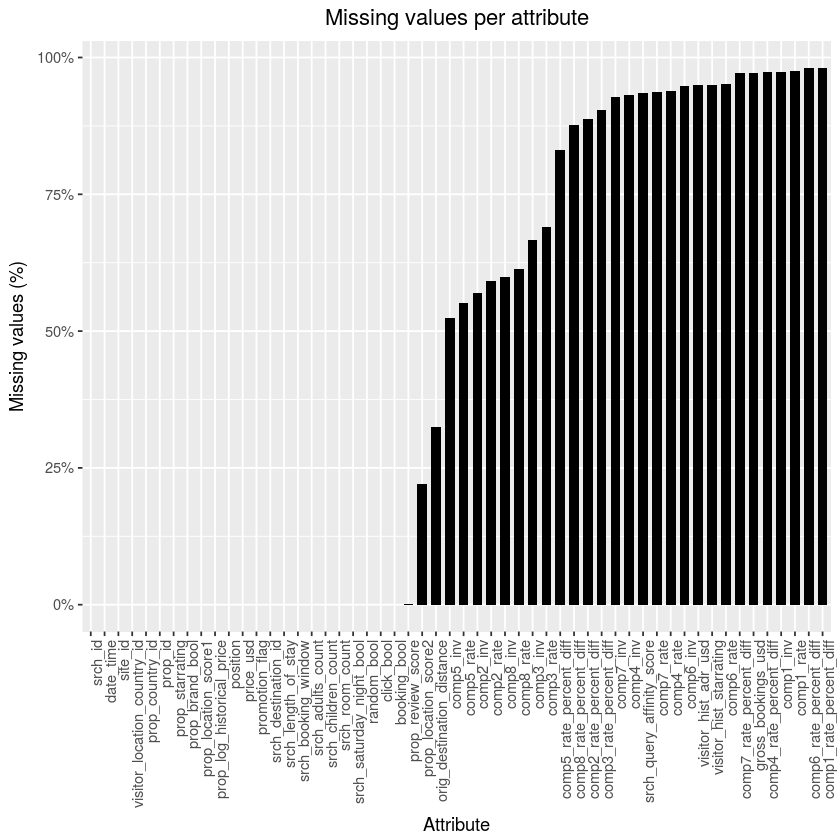

In [5]:
# Plot missing values bar plot
ggplot(data=na.df,aes(x=factor(attribute),y=missing_values)) + 
geom_bar(stat="identity",width=0.7, fill="black") +
theme(axis.text.x = element_text(angle = 90, hjust = 1), plot.title = element_text(hjust = 0.5)) + 
scale_x_discrete(limits=position) + scale_y_continuous(labels=percent) +
labs(title="Missing values per attribute", x="Attribute", y="Missing values (%)")

## Data summaries

In [6]:
summary(train)

    srch_id                     date_time          site_id      
 Min.   :     1   2012-11-02 14:04:51:     95   Min.   : 1.000  
 1st Qu.: 82936   2012-12-26 10:59:30:     87   1st Qu.: 5.000  
 Median :166507   2013-05-15 18:39:51:     70   Median : 5.000  
 Mean   :166367   2012-11-23 07:28:55:     69   Mean   : 9.953  
 3rd Qu.:249724   2012-12-03 10:33:44:     68   3rd Qu.:14.000  
 Max.   :332785   2012-12-26 14:26:28:     68   Max.   :34.000  
                  (Other)            :4957890                   
 visitor_location_country_id visitor_hist_starrating visitor_hist_adr_usd
 Min.   :  1.0               Min.   :1               Min.   :   0        
 1st Qu.:100.0               1st Qu.:3               1st Qu.: 110        
 Median :219.0               Median :3               Median : 152        
 Mean   :175.3               Mean   :3               Mean   : 176        
 3rd Qu.:219.0               3rd Qu.:4               3rd Qu.: 213        
 Max.   :231.0               Max.   

In [7]:
#summary(test)

# Exploratory data analysis

## Plot something else

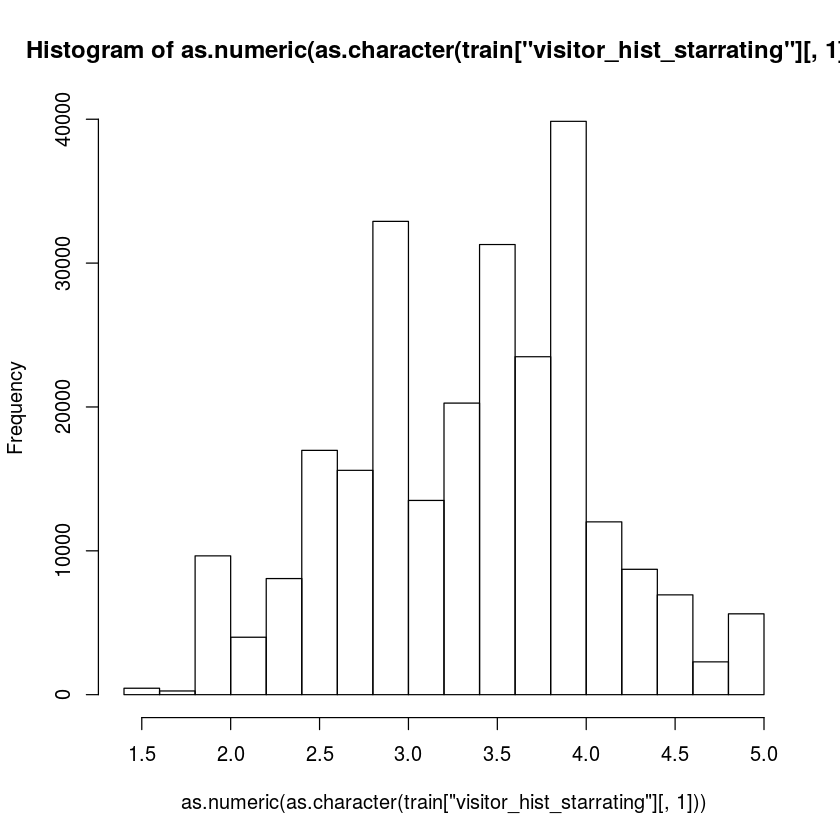

In [8]:
#ggplot(data=train,aes(x=visitor_hist_starrating)) + geom_histogram(bins=30)
hist(as.numeric(as.character(train["visitor_hist_starrating"][,1])))

# Fill in missing values

In [9]:
train["prop_review_score"][is.na(train["prop_review_score"])] <- 0

# Correlation plot of the numeric attributes

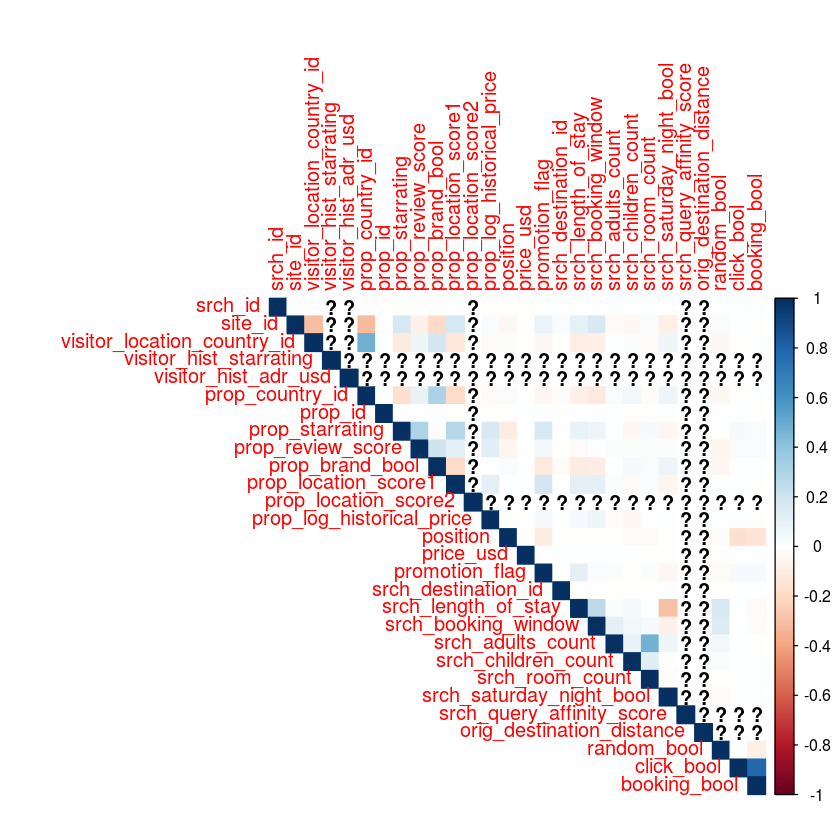

In [10]:
train.nums <- unlist(lapply(train, is.numeric))
l.idx <- length(colnames(train))

corrplot(cor(train[colnames(train)[c(1,3:27,l.idx-2,l.idx)]]),method="color",type="upper")